# Dat121 project


### Imports

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


### Loading dataset

In [51]:
raw_df = pd.read_csv('heart.csv', low_memory=False)

### Raw data exploration

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

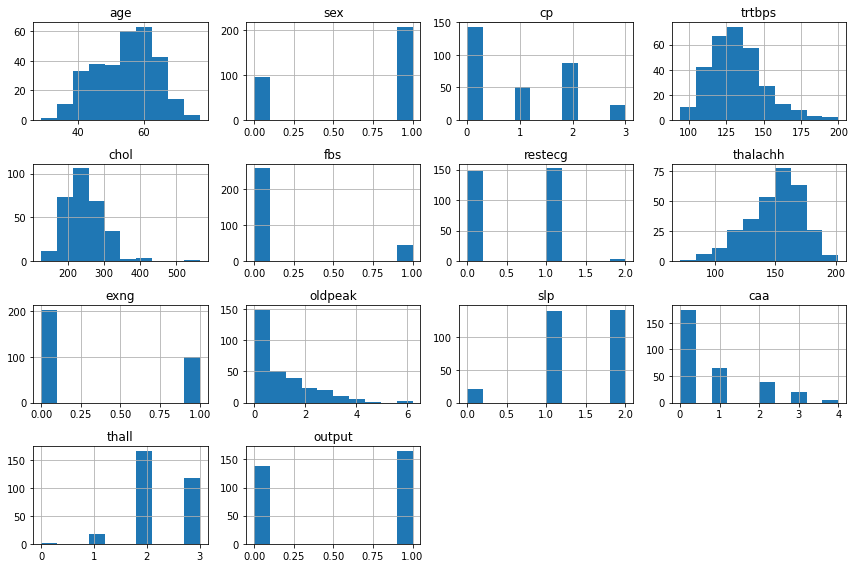

NameError: name 'g' is not defined

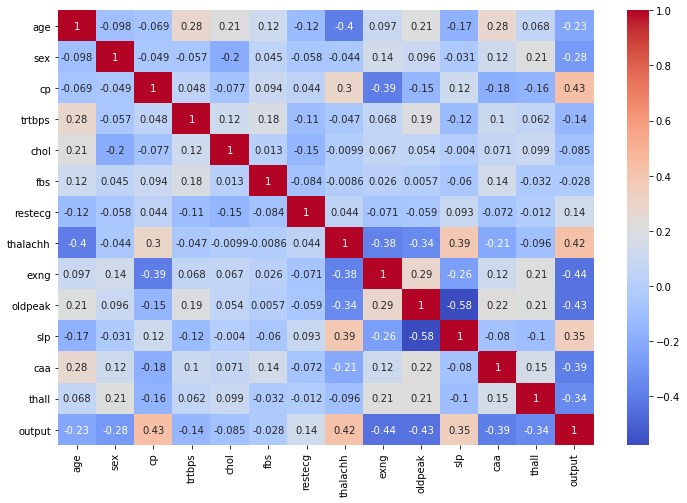

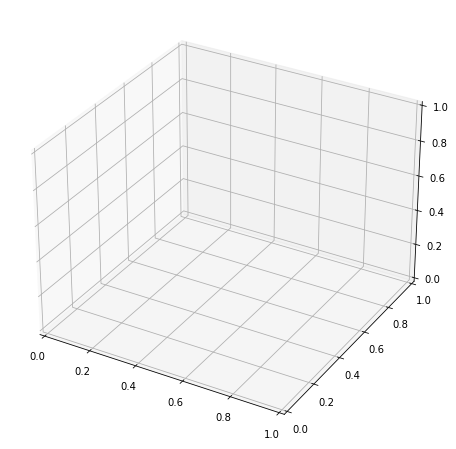

In [52]:
# Descriptive statistics
descr_stats= raw_df.describe()
print(descr_stats)


# Searching for missing values
print("Missing values in dataset:\n", raw_df.isnull().sum())
# no missing values in the dataset.


# Histogram for features in the dataset
raw_df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


# Correlation heatmap
corrmat = raw_df.corr()
top_corr = corrmat.index
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(raw_df[top_corr].corr(),annot=True,cmap="coolwarm")


# Scatterplot 
# For features age, sex and cp (chestpain type), colored by output.
# Sex = 0 indicates female, 
# Sex = 1 indicates male.
# Cp have values 0, 1, 2 or 3. 0 being typical angina, 3 being no symptoms. 
# Output = 0 means lesser chance of heartattack, colored blue.
# Output = 1 means higher chance for heart attack, colored red.

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
g
x = raw_df['sex']
y = raw_df['age']
z = raw_df['cp']
c = raw_df['output']  

# Defining colors of the dots
colors = np.where(c == 0, 'blue', 'red')

# Scatter plot with color based on 'output'
ax.scatter(x, y, z, c=colors)
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_zlabel('CP')

plt.show()


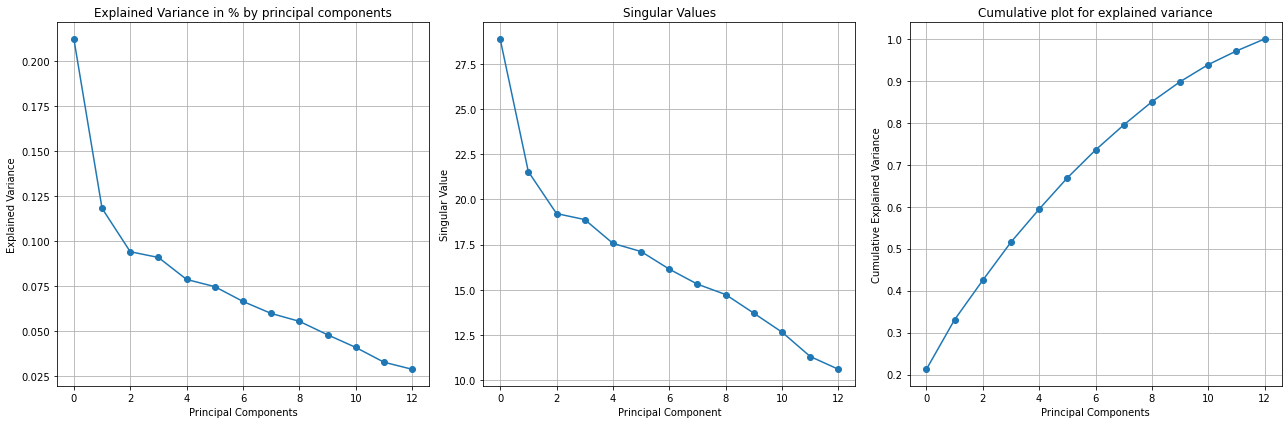

In [53]:
# PCA of scaled data to explore data and further reduce dimensionality

# Standardizing raw data
raw_df =(raw_df - raw_df.mean()) / raw_df.std()
# dropping last column (target values)
df_norm = raw_df.drop(raw_df.columns[-1], axis=1)

# Copy of dataframe for later use
copy = df_norm.copy()

# Performing PCA and fitting on data
pca = PCA(n_components=13)
pca.fit(df_norm)

loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_norm.columns))],
index=df_norm.columns)
#print(loadings)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot of prinipal components and explained variance
ax1.grid(True)
ax1.plot(pca.explained_variance_ratio_, marker='o')
ax1.set_ylabel('Explained Variance')
ax1.set_xlabel('Principal Components')
ax1.grid(True)
ax1.set_title('Explained Variance in % by principal components')

# Singular values plot
ax2.grid(True)
ax2.set_title("Singular Values")
ax2.plot(pca.singular_values_, marker='o')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Singular Value')

# Cumulative plot
variance = np.cumsum(pca.explained_variance_ratio_)
ax3.grid(True)
ax3.plot(variance, marker='o')
ax3.set_ylabel('Cumulative Explained Variance')
ax3.set_xlabel('Principal Components')
ax3.grid(True)
ax3.set_title('Cumulative plot for explained variance')

plt.tight_layout()
plt.show()


### Interpretation of data exploration
* 
* 
*

### Data preprocessing

In [54]:
# Splitting the data with PCA(n=13) into training and test sets:
X = df_norm.drop(columns=[df_norm.columns[-1]])  
y = df_norm[df_norm.columns[-1]] 

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Copy of the dataset to further compare final results when we have done pca n=13 vs. pca n=3.
# Performing PCA with n=3 components
pca2 = PCA(n_components=3)
pca2.fit(copy)

# Splitting the data with PCA(n=3) into training and test sets:
X2 = copy.drop(columns=[copy.columns[-1]])  
y2 = copy[copy.columns[-1]] 

# Splitting the data into training and testing sets (70% train, 30% test)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


# Now, X_train and y_train can be used to train the model
# X_test and y_test will be used for evaluating the model

#Additionally, ‘random_state=42’ is used to ensure reproducibility of the results,
#that is, 42 is an arbitrary number ensuring that the split is the same every time the split is performed.


### Modeling

In [ ]:
# Train models and fit on datasets X_train, y train.

